In [13]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
#df_uk = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\CleanedDataUK.xlsx')

url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/CleanedDataUK.xlsx'
df_uk = pd.read_excel(url)  # Works similarly for CSV

df_uk

Reference         Country       Date  Year      Month  \
0     r980915a_BOE  United Kingdom 1998-09-15  1998  September   
1     r981021b_BOE  United Kingdom 1998-10-21  1998    October   
2     r981021a_BOE  United Kingdom 1998-10-21  1998    October   
3     r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4     r981101b_BOE  United Kingdom 1998-11-01  1998   November   
...            ...             ...        ...   ...        ...   
1204  r220428a_BOE  United Kingdom 2022-04-28  2022      April   
1205  r220426a_BOE  United Kingdom 2022-04-26  2022      April   
1206  r220503a_BOE  United Kingdom 2022-05-03  2022        May   
1207  r221019a_BOE  United Kingdom 2022-10-19  2022    October   
1208  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                  Title     Author IsGov  \
0                                                Speech     George   Yes   
1                                     Britain in Europe     George   Yes   
2     Impact of the recent turbulence in internation...       King    No   
3           Economic policy, with and without forecasts       Budd    No   
4     Inflation targeting in practice: the UK experi...    Vickers    No   
...                                                 ...        ...   ...   
1204                                           Macropru    Breeden    No   
1205                                          Bufferati      Woods    No   
1206  Why macroprudential policy needs to tackle fin...   Stheeman    No   
1207  Governance of ‚ÄúDecentralised‚Äù Finance: Get up,...    Wilkins    No   
1208       The inflationary consequences of real shocks  Broadbent    No   

                                                   Text  
0     Thank you, Chairman. I'm actually very pleased...  
1     It's a great pleasure to be here in the beauti...  
2     Few industries have suffered more from volatil...  
3     My topic this evening is the use of forecasts ...  
4     Six years ago this week, sterling left the exc...  
...                                                 ...  
1204  Dimitri Demekas and Paul Tucker for helpful di...  
1205  Copies of publications are available from: Thi...  
1206  Elisabeth Stheeman notes that climate change a...  
1207  These are divided into seven categories, suffr...  
1208  Between them, the Covid-19 pandemic and Russia...  

[1209 rows x 9 columns]

**Remove URLs, hashtags, special characters, stopwords from the speeches**

In [8]:
# Prepare stopwords, excluding 'not'
stop_words = set(stopwords.words('english')) - {'not'}

# Apply all preprocessing steps 
df_uk['Text'] = (
    df_uk['Text']
    .astype(str)  # Ensure all values are strings
    #.apply(contractions.fix)  # Expand contractions
    .str.replace(r'http\S+', '', regex=True)  # Remove URLs
    .str.replace('#', '', regex=False)  # Remove hashtags
    .str.replace(r'\W', ' ', regex=True)  # Remove special characters
    .str.lower()  # Convert to lowercase
    .apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))  # Remove stopwords (except 'not')
)
df_uk

Reference         Country       Date  Year      Month  \
0     r980915a_BOE  United Kingdom 1998-09-15  1998  September   
1     r981021b_BOE  United Kingdom 1998-10-21  1998    October   
2     r981021a_BOE  United Kingdom 1998-10-21  1998    October   
3     r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4     r981101b_BOE  United Kingdom 1998-11-01  1998   November   
...            ...             ...        ...   ...        ...   
1204  r220428a_BOE  United Kingdom 2022-04-28  2022      April   
1205  r220426a_BOE  United Kingdom 2022-04-26  2022      April   
1206  r220503a_BOE  United Kingdom 2022-05-03  2022        May   
1207  r221019a_BOE  United Kingdom 2022-10-19  2022    October   
1208  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                  Title     Author IsGov  \
0                                                Speech     George   Yes   
1                                     Britain in Europe     George   Yes   
2     Impact of the recent turbulence in internation...       King    No   
3           Economic policy, with and without forecasts       Budd    No   
4     Inflation targeting in practice: the UK experi...    Vickers    No   
...                                                 ...        ...   ...   
1204                                           Macropru    Breeden    No   
1205                                          Bufferati      Woods    No   
1206  Why macroprudential policy needs to tackle fin...   Stheeman    No   
1207  Governance of ‚ÄúDecentralised‚Äù Finance: Get up,...    Wilkins    No   
1208       The inflationary consequences of real shocks  Broadbent    No   

                                                   Text  
0     thank chairman actually pleased opportunity re...  
1     great pleasure beautiful city bruges honoured ...  
2     industries suffered volatility british economy...  
3     topic evening use forecasts economic policy ma...  
4     six years ago week sterling left exchange rate...  
...                                                 ...  
1204  dimitri demekas paul tucker helpful discussion...  
1205  copies publications available publication avai...  
1206  elisabeth stheeman notes climate change transi...  
1207  divided seven categories suffrage systems whos...  
1208  covid 19 pandemic russia invasion ukraine infl...  

[1209 rows x 9 columns]

In [15]:
# Filter the data for years between 2020 and 2022
filtered_df_year_2020_2022 = df_uk[(df_uk['Year'] >= 2020) & (df_uk['Year'] <= 2022)]
filtered_df_year_2020_2022

Reference         Country       Date  Year      Month  \
1042  r200123a_BOE  United Kingdom 2020-01-23  2020    January   
1043  r200205a_BOE  United Kingdom 2020-02-05  2020   February   
1044  r200211b_BOE  United Kingdom 2020-02-11  2020   February   
1045  r200211a_BOE  United Kingdom 2020-02-11  2020   February   
1046  r200930a_BOE  United Kingdom 2020-09-30  2020  September   
...            ...             ...        ...   ...        ...   
1204  r220428a_BOE  United Kingdom 2022-04-28  2022      April   
1205  r220426a_BOE  United Kingdom 2022-04-26  2022      April   
1206  r220503a_BOE  United Kingdom 2022-05-03  2022        May   
1207  r221019a_BOE  United Kingdom 2022-10-19  2022    October   
1208  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                  Title     Author IsGov  \
1042  Responding to leaps in payments: from unbundli...    Knowles    No   
1043          Stress tests: a policymaker‚Äôs perspective       Kohn    No   
1044              Governance of financial globalisation   Cunliffe    No   
1045          Monetary policy in the intangible economy     Haskel    No   
1046                          Avoiding economic anxiety    Haldane    No   
...                                                 ...        ...   ...   
1204                                           Macropru    Breeden    No   
1205                                          Bufferati      Woods    No   
1206  Why macroprudential policy needs to tackle fin...   Stheeman    No   
1207  Governance of ‚ÄúDecentralised‚Äù Finance: Get up,...    Wilkins    No   
1208       The inflationary consequences of real shocks  Broadbent    No   

                                                   Text  
1042  Good morning. I would like to thank the Westmi...  
1043  Simultaneous, transparent bank stress tests ar...  
1044  Jon Cunliffe sets out the progress we have mad...  
1045  I am grateful to Marco Garofalo and Jamie Lenn...  
1046  The views expressed here are not necessarily t...  
...                                                 ...  
1204  Dimitri Demekas and Paul Tucker for helpful di...  
1205  Copies of publications are available from: Thi...  
1206  Elisabeth Stheeman notes that climate change a...  
1207  These are divided into seven categories, suffr...  
1208  Between them, the Covid-19 pandemic and Russia...  

[167 rows x 9 columns]

In [16]:
# Read the bank rate file and create the data frame
#df_bank_rates = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\bank_rates_years_months-2.xlsx')
#https://github.com/gamzebb/group-project/raw/refs/heads/main/cleaned_economic_data/bank_rates_years_months-2.xlsx
#df_bank_rates = pd.read_csv(r'C:\Users\elif.ozkol\Desktop\LSE Project\bank_rates_years_months.xlsx')

url_bank_rates = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/cleaned_economic_data/bank_rates_years_months-2.xlsx'
df_bank_rates = pd.read_excel(url_bank_rates)  # Works similarly for CSV

df_bank_rates

BankRate  Year      Month
0        6.50  1997       June
1        6.75  1997       July
2        7.00  1997     August
3        7.00  1997  September
4        7.00  1997    October
..        ...   ...        ...
310      5.00  2024  September
311      4.75  2024   November
312      4.75  2024   December
313      4.50  2025   February
314      4.50  2025      March

[315 rows x 3 columns]

In [17]:
# Filter bank rates for only 2020-2022
filtered_df_bank_rates_2020_2022 = df_bank_rates[(df_bank_rates['Year'] >= 2020) & (df_bank_rates['Year'] <= 2022)]
filtered_df_bank_rates_2020_2022

BankRate  Year      Month
259      0.75  2020    January
260      0.75  2020   February
261      0.25  2020      March
262      0.10  2020      March
263      0.10  2020      March
264      0.10  2020      April
265      0.10  2020        May
266      0.10  2020       June
267      0.10  2020       July
268      0.10  2020     August
269      0.10  2020  September
270      0.10  2020    October
271      0.10  2020   November
272      0.10  2020   December
273      0.10  2021    January
274      0.10  2021   February
275      0.10  2021      March
276      0.10  2021      April
277      0.10  2021        May
278      0.10  2021       June
279      0.10  2021       July
280      0.10  2021     August
281      0.10  2021  September
282      0.10  2021    October
283      0.10  2021   November
284      0.25  2021   December
285      0.25  2022    January
286      0.50  2022   February
287      0.75  2022      March
288      0.75  2022      April
289      1.00  2022        May
290      1.25  2022       June
291      1.25  2022       July
292      1.75  2022     August
293      2.25  2022  September
294      2.25  2022    October
295      3.00  2022   November
296      3.50  2022   December

In [20]:
filtered_df_year_2020_2022.loc[:, 'Month'] = filtered_df_year_2020_2022['Month'].astype(str)
filtered_df_bank_rates_2020_2022.loc[:, 'Month'] = filtered_df_bank_rates_2020_2022['Month'].astype(str)


In [21]:
monthly_rates = (
    filtered_df_bank_rates_2020_2022
    .groupby(['Year', 'Month'], as_index=False)
    .agg({'BankRate': 'last'})
)

df_merged_by_month = filtered_df_year_2020_2022.merge(
    monthly_rates,
    on=['Year', 'Month'],
    how='left'
).rename(columns={'BankRate': 'Rate'})


In [22]:
df_merged_by_month

Reference         Country       Date  Year      Month  \
0    r200123a_BOE  United Kingdom 2020-01-23  2020    January   
1    r200205a_BOE  United Kingdom 2020-02-05  2020   February   
2    r200211b_BOE  United Kingdom 2020-02-11  2020   February   
3    r200211a_BOE  United Kingdom 2020-02-11  2020   February   
4    r200930a_BOE  United Kingdom 2020-09-30  2020  September   
..            ...             ...        ...   ...        ...   
162  r220428a_BOE  United Kingdom 2022-04-28  2022      April   
163  r220426a_BOE  United Kingdom 2022-04-26  2022      April   
164  r220503a_BOE  United Kingdom 2022-05-03  2022        May   
165  r221019a_BOE  United Kingdom 2022-10-19  2022    October   
166  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                 Title     Author IsGov  \
0    Responding to leaps in payments: from unbundli...    Knowles    No   
1            Stress tests: a policymaker‚Äôs perspective       Kohn    No   
2                Governance of financial globalisation   Cunliffe    No   
3            Monetary policy in the intangible economy     Haskel    No   
4                            Avoiding economic anxiety    Haldane    No   
..                                                 ...        ...   ...   
162                                           Macropru    Breeden    No   
163                                          Bufferati      Woods    No   
164  Why macroprudential policy needs to tackle fin...   Stheeman    No   
165  Governance of ‚ÄúDecentralised‚Äù Finance: Get up,...    Wilkins    No   
166       The inflationary consequences of real shocks  Broadbent    No   

                                                  Text  Rate  
0    Good morning. I would like to thank the Westmi...  0.75  
1    Simultaneous, transparent bank stress tests ar...  0.75  
2    Jon Cunliffe sets out the progress we have mad...  0.75  
3    I am grateful to Marco Garofalo and Jamie Lenn...  0.75  
4    The views expressed here are not necessarily t...  0.10  
..                                                 ...   ...  
162  Dimitri Demekas and Paul Tucker for helpful di...  0.75  
163  Copies of publications are available from: Thi...  0.75  
164  Elisabeth Stheeman notes that climate change a...  1.00  
165  These are divided into seven categories, suffr...  2.25  
166  Between them, the Covid-19 pandemic and Russia...  2.25  

[167 rows x 10 columns]

**Finbert Sentiment Analysis**

In [23]:
# Import all the necessary packages.
#!pip install transformers
#!pip install torch torchvision torchaudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import transformers
import nltk
nltk.download('punkt')

from transformers import BertTokenizer, BertForSequenceClassification

print(transformers.__version__)
print(torch.__version__)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4.51.3
2.7.0+cpu


In [24]:
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')
model.eval()  # Set model to evaluation mode

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [25]:
print("FinBERT labels:", model.config.id2label)
# Should print: {0: 'Neutral', 1: 'Positive', 2: 'Negative'}


FinBERT labels: {0: 'Neutral', 1: 'Positive', 2: 'Negative'}


In [26]:
def chunk_text(text, max_length=510):
    sentences = sent_tokenize(text)
    current_chunk = []
    chunks = []

    for sentence in sentences:
        current_chunk.append(sentence)
        tokenized = tokenizer(" ".join(current_chunk), return_tensors="pt", truncation=False)
        if tokenized['input_ids'].shape[1] > max_length:
            current_chunk.pop()
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentence]
    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks

In [27]:
def analyse_sentiment(text):
    chunks = chunk_text(text)
    sentiments = []

    for chunk in chunks:
        inputs = tokenizer(chunk, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().numpy()[0]
        sentiments.append(probs)

    avg_sentiments = np.mean(sentiments, axis=0)
    sentiment_series = pd.Series({
        'neutral_finbert': avg_sentiments[0],
        'positive_finbert': avg_sentiments[1],
        'negative_finbert': avg_sentiments[2],
        'polarity_score_finbert': avg_sentiments[1] - avg_sentiments[2]
    })
    return sentiment_series

In [28]:
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
#nltk.download('punkt')

tqdm.pandas()  # Enable progress bar
finbert_results = df_merged_by_month['Text'].progress_apply(lambda x: analyse_sentiment(str(x)))
df_merged_by_month = pd.concat([df_merged_by_month.reset_index(drop=True), finbert_results], axis=1)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 167/167 [25:11<00:00,  9.05s/it]


In [34]:
df_merged_by_month

Reference         Country       Date  Year      Month  \
0    r200123a_BOE  United Kingdom 2020-01-23  2020    January   
1    r200205a_BOE  United Kingdom 2020-02-05  2020   February   
2    r200211b_BOE  United Kingdom 2020-02-11  2020   February   
3    r200211a_BOE  United Kingdom 2020-02-11  2020   February   
4    r200930a_BOE  United Kingdom 2020-09-30  2020  September   
..            ...             ...        ...   ...        ...   
162  r220428a_BOE  United Kingdom 2022-04-28  2022      April   
163  r220426a_BOE  United Kingdom 2022-04-26  2022      April   
164  r220503a_BOE  United Kingdom 2022-05-03  2022        May   
165  r221019a_BOE  United Kingdom 2022-10-19  2022    October   
166  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                 Title     Author IsGov  \
0    Responding to leaps in payments: from unbundli...    Knowles    No   
1            Stress tests: a policymaker‚Äôs perspective       Kohn    No   
2                Governance of financial globalisation   Cunliffe    No   
3            Monetary policy in the intangible economy     Haskel    No   
4                            Avoiding economic anxiety    Haldane    No   
..                                                 ...        ...   ...   
162                                           Macropru    Breeden    No   
163                                          Bufferati      Woods    No   
164  Why macroprudential policy needs to tackle fin...   Stheeman    No   
165  Governance of ‚ÄúDecentralised‚Äù Finance: Get up,...    Wilkins    No   
166       The inflationary consequences of real shocks  Broadbent    No   

                                                  Text  Rate  neutral_finbert  \
0    Good morning. I would like to thank the Westmi...  0.75         0.694933   
1    Simultaneous, transparent bank stress tests ar...  0.75         0.816252   
2    Jon Cunliffe sets out the progress we have mad...  0.75         0.751118   
3    I am grateful to Marco Garofalo and Jamie Lenn...  0.75         0.947242   
4    The views expressed here are not necessarily t...  0.10         0.373072   
..                                                 ...   ...              ...   
162  Dimitri Demekas and Paul Tucker for helpful di...  0.75         0.499167   
163  Copies of publications are available from: Thi...  0.75         0.950695   
164  Elisabeth Stheeman notes that climate change a...  1.00         0.823678   
165  These are divided into seven categories, suffr...  2.25         0.999149   
166  Between them, the Covid-19 pandemic and Russia...  2.25         0.937631   

     positive_finbert  negative_finbert  polarity_score_finbert  
0            0.303714          0.001353                0.302361  
1            0.063540          0.120209               -0.056669  
2            0.248290          0.000592                0.247698  
3            0.045011          0.007748                0.037263  
4            0.237735          0.389194               -0.151459  
..                ...               ...                     ...  
162          0.190968          0.309866               -0.118898  
163          0.036319          0.012986                0.023333  
164          0.125532          0.050790                0.074741  
165          0.000838          0.000012                0.000826  
166          0.006617          0.055753               -0.049136  

[167 rows x 14 columns]

**Group by Month**

In [35]:
# Ensure 'Month' column is treated as categorical with proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_merged_by_month['Month'] = pd.Categorical(df_merged_by_month['Month'], categories=month_order, ordered=True)

monthly_avg = df_merged_by_month.groupby('Month', observed=True).agg({
    'Rate': 'mean',
    'neutral_finbert': 'mean',
    'positive_finbert': 'mean',
    'negative_finbert': 'mean',
    'polarity_score_finbert': 'mean',
    'Reference': 'count'
}).reset_index()
# Rename for clarity
monthly_avg.rename(columns={'Reference': 'NumofSpeeches'}, inplace=True)

# Sort by proper month order
monthly_avg = monthly_avg.sort_values('Month')


monthly_avg

Month      Rate  neutral_finbert  positive_finbert  negative_finbert  \
0     January  0.333333         0.751249          0.104594          0.144157   
1    February  0.455556         0.759511          0.149608          0.090880   
2       March  0.300000         0.696748          0.171131          0.132121   
3       April  0.360000         0.720092          0.194412          0.085496   
4         May  0.415000         0.830021          0.044185          0.125793   
5        June  0.560000         0.653770          0.200051          0.146179   
6        July  0.514000         0.735731          0.144111          0.120158   
7      August  0.100000         0.992871          0.002222          0.004907   
8   September  0.816667         0.758474          0.079289          0.162237   
9     October  0.858824         0.804567          0.110074          0.085359   
10   November  0.100000         0.858958          0.075029          0.066013   
11   December  0.160000         0.737312          0.084528          0.178161   

    polarity_score_finbert  NumofSpeeches  
0                -0.039563              9  
1                 0.058728             18  
2                 0.039010             13  
3                 0.108916             15  
4                -0.081608             20  
5                 0.053873             15  
6                 0.023953             25  
7                -0.002685              1  
8                -0.082948             18  
9                 0.024715             17  
10                0.009016             11  
11               -0.093633              5

**Monthly Polarity Score and Bank Rate**

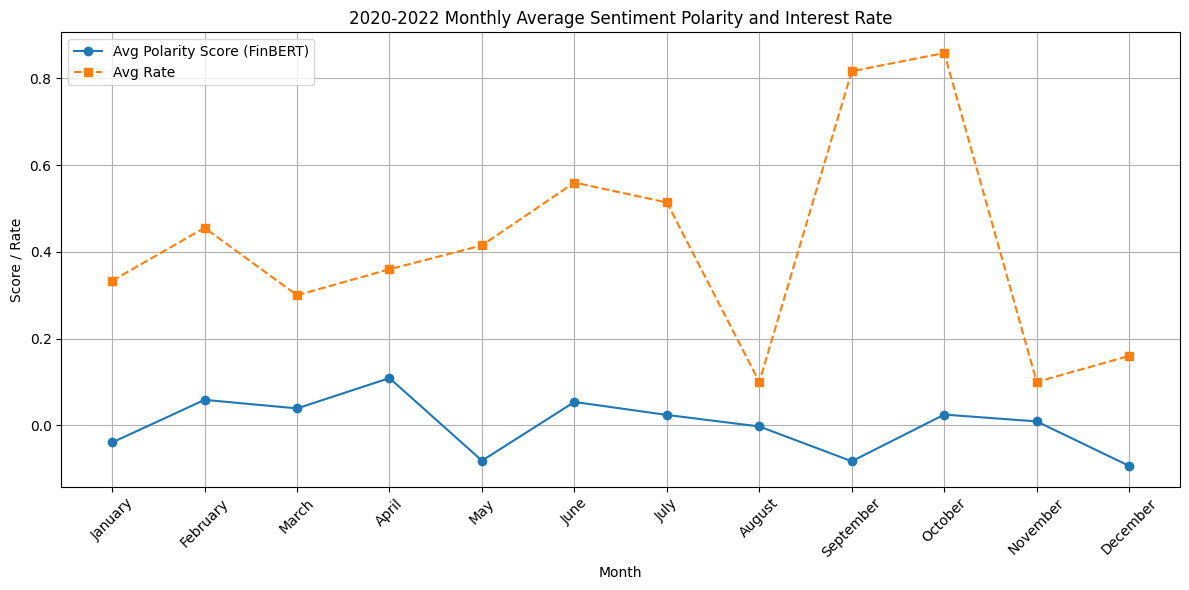

In [37]:
# Create the figure
plt.figure(figsize=(12, 6))

# Plot polarity score
plt.plot(monthly_avg['Month'], monthly_avg['polarity_score_finbert'], marker='o', label='Avg Polarity Score (FinBERT)')

# Plot Rate on secondary y-axis
plt.plot(monthly_avg['Month'], monthly_avg['Rate'], marker='s', linestyle='--', label='Avg Rate')

# Formatting
plt.title('2020-2022 Monthly Average Sentiment Polarity and Interest Rate')
plt.xlabel('Month')
plt.ylabel('Score / Rate')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Key Observations:**

* April, June, October	Show spikes in positive sentiment (highest polarity scores) ‚Äî likely aligned with optimistic or policy-shift communications.

* May, September, December	Show dips into negative territory, suggesting more pessimistic tone in those months.

* August and November	Very low interest rates ‚Äî possibly corresponding to quieter or more dovish policy periods.

* September and October	Have high interest rates but low or neutral sentiment ‚Äî might indicate restrictive policies despite muted optimism.

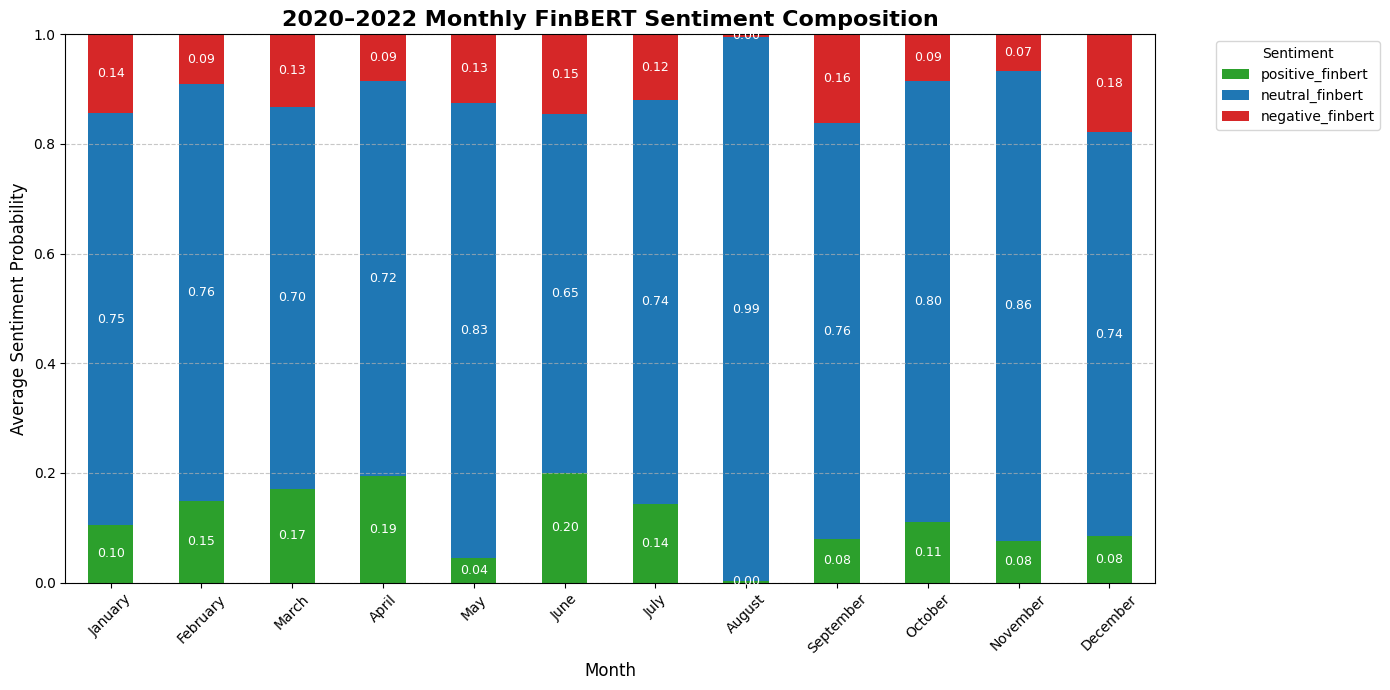

In [41]:
# Set a color palette for sentiment categories
colors = ['#2ca02c', '#1f77b4', '#d62728']  # positive (green), neutral (blue), negative (red)

# Plot
ax = monthly_avg.set_index('Month')[['positive_finbert', 'neutral_finbert', 'negative_finbert']].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    color=colors
)

# Enhance aesthetics
plt.title('2020‚Äì2022 Monthly FinBERT Sentiment Composition', fontsize=16, weight='bold')
plt.ylabel('Average Sentiment Probability', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add value labels inside the bars (optional)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=9, color='white')

plt.show()


Green bars (positive_finbert) are slightly higher in:

* June (~20%)

* April and March (~17‚Äì19%)

* February (~15%)

These months likely featured more optimistic outlooks, policy reassurances, or favorable economic updates.

Negative Sentiment Spikes

Red bars (negative_finbert) are:

* Highest in December (~18%)

* Elevated in January, March, and August (~13‚Äì16%)

This could align with discussions around uncertainty, risk, or challenges ‚Äî e.g., end-of-year summaries, outlook warnings, or crisis-related commentary.

**Positive + Negative Sentiment Only**

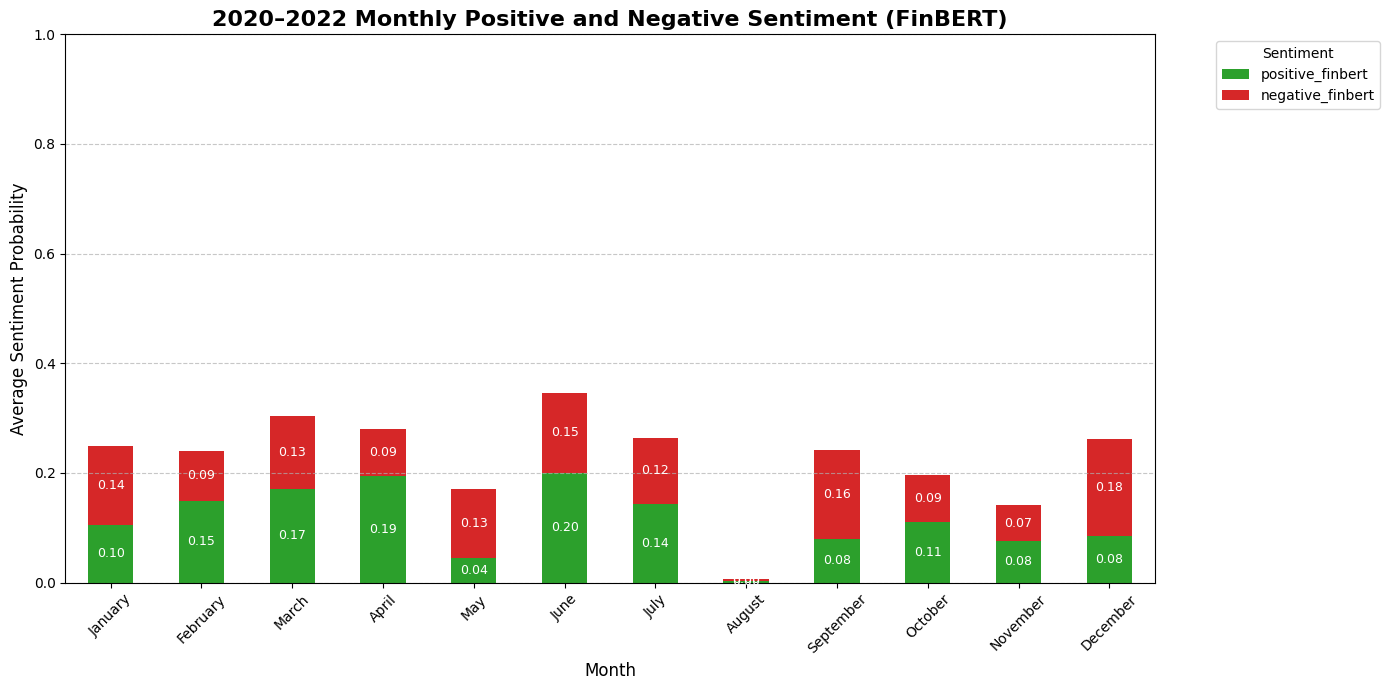

In [43]:
# Set color palette: positive (green), negative (red)
colors = ['#2ca02c', '#d62728']  # positive, negative

# Plot only positive and negative sentiment
ax = monthly_avg.set_index('Month')[['positive_finbert', 'negative_finbert']].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    color=colors
)

# Enhance aesthetics
plt.title('2020‚Äì2022 Monthly Positive and Negative Sentiment (FinBERT)', fontsize=16, weight='bold')
plt.ylabel('Average Sentiment Probability', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add value labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=9, color='white')

plt.show()

Positive Sentiment High in:

* June (0.20) and April/March (~0.17‚Äì0.19) ‚Äî these months likely included speeches with optimistic economic outlooks, policy improvements, or favorable news.

* February is also relatively high at 0.15, which may reflect early-year confidence.

Negative Sentiment Spikes in:

* December (0.18) ‚Äì Highest negative sentiment of the year. Possibly tied to year-end risks, warnings, or critical assessments.

* September (0.16) and June (0.15) ‚Äì Months with sharper caution or concern in tone.

June is interesting ‚Äî high positive and high negative sentiment ‚Üí likely polarized tone or documents mixing encouragement and caution.

December and September reflect more concern or warning-heavy communication ‚Äî possibly aligning with end-of-year assessments or pre-budget statements.

**Analyze Correlation**

In [19]:
correlation = df_merged_by_month['Rate'].corr(df_merged_by_month['polarity_score_finbert'])
print(f"Correlation between rate and FinBERT polarity: {correlation:.4f}")


Correlation between rate and FinBERT polarity: -0.1664


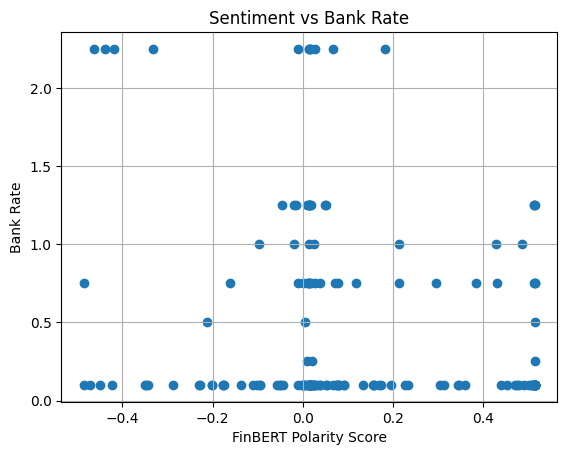

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df_merged_by_month['polarity_score_finbert'], df_merged_by_month['Rate'])
plt.xlabel("FinBERT Polarity Score")
plt.ylabel("Bank Rate")
plt.title("Sentiment vs Bank Rate")
plt.grid(True)
plt.show()

 Observations:
 
Wide Spread Around 0 Sentiment:

Most speeches cluster around neutral polarity (~0).

Bank rates at neutral sentiment still vary widely from 0% to over 2% ‚Äî showing that sentiment alone doesn‚Äôt directly align with rate levels.

High Bank Rates Exist Across Sentiments:

Rates above 2% occur even when sentiment is negative, neutral, and positive.

This implies that  rate is influenced by factors not captured fully by tone/sentiment alone.



In [25]:
print(df_merged_by_month['Direction'].value_counts())


Direction
same    132
up       19
down     16
Name: count, dtype: int64


In [26]:
df_merged_by_month['Direction_Binary'] = df_merged_by_month['Direction'].apply(
    lambda x: 1 if x == 'up' else 0  # 1 = up, 0 = not-up (down or same)
)

In [27]:
from sklearn.model_selection import train_test_split

X = df_merged_by_month[['polarity_score_finbert']]
y = df_merged_by_month['Direction_Binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       0.00      0.00      0.00         4

    accuracy                           0.88        34
   macro avg       0.44      0.50      0.47        34
weighted avg       0.78      0.88      0.83        34



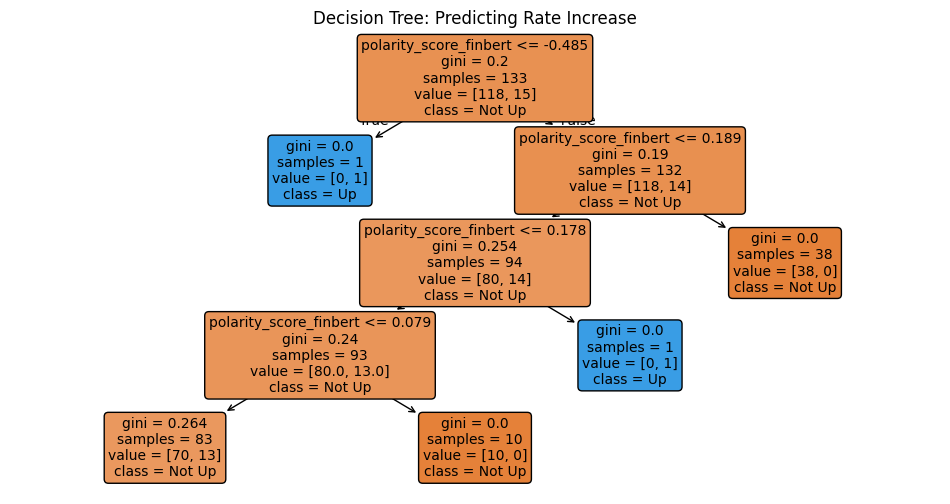

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))  # Adjust size as needed
plot_tree(
    clf,
    feature_names=['polarity_score_finbert'],
    class_names=['Not Up', 'Up'],  # Adjust if you're using multiclass
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree: Predicting Rate Increase")
plt.show()

* It shows how the FinBERT polarity score is used to classify whether the Bank of England raised rates (Up) or not (Not Up) after a speech.

Each node (box) represents a decision rule based on polarity_score_finbert, with the following info:

gini: impurity (lower is purer; 0 means all one class)

samples: number of data points reaching the node

value = [not_up, up]: actual count of samples in each class

class: majority class at that node

A large portion of the data has polarity between -0.485 and 0.189, and those mostly led to no rate hikes.

üî∏ All 'Up' Predictions Happen at Rare Nodes:
Only 3 nodes predict "Up" (value = [0, 1]):

These nodes have just 1 sample each.

This shows the model found very few cases where sentiment strongly aligned with a rate increase.
The tree learned that most sentiment scores, even positive ones, are not strong indicators of a rate hike.

Only rare, extreme sentiment patterns slightly correlate with rate increases.

The data is highly imbalanced, with most outcomes being "Not Up".